In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the LFW dataset using PyTorch's DataLoader
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = torch.tensor(lfw_people.data, dtype=torch.float32)
n_features = X.shape[1] #数据集中每个样本（在这里是图像）的特征数量
# the label to predict is the id of the person
y = torch.tensor(lfw_people.target, dtype=torch.int64)
target_names = lfw_people.target_names
n_classes = target_names.shape[0] #数据集中不同的类别或标签的数量
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

C:\Users\47647\AppData\Local\Temp\ipykernel_21712\4081605438.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float64).clone().detach()
C:\Users\47647\AppData\Local\Temp\ipykernel_21712\4081605438.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float64).clone().detach()


torch.Size([966, 150])
torch.Size([322, 150])


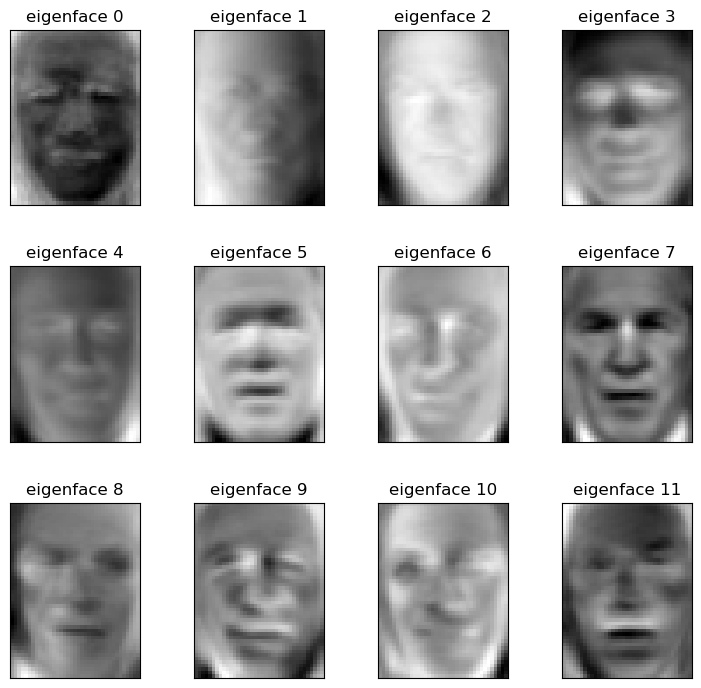

In [12]:
# Define the number of principal components
n_components = 150

# Center data
X_train = torch.tensor(X_train, dtype=torch.float64).clone().detach()
X_test = torch.tensor(X_test, dtype=torch.float64).clone().detach()
mean = torch.mean(X_train, dim=0)
X_train -= mean
X_test -= mean

# Eigen-decomposition using SVD
U, S, Vh = torch.linalg.svd(X_train, full_matrices=False)
V = Vh.mH
components = V[:, :n_components]
eigenfaces = components.reshape(n_components, h, w)

# Project into PCA subspace
X_transformed = torch.mm(X_train, components)
X_test_transformed = torch.mm(X_test, components)
print(X_transformed.shape)
print(X_test_transformed.shape)

# Plot eigenfaces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(torch_eigenfaces, eigenface_titles, h, w)
plt.show()

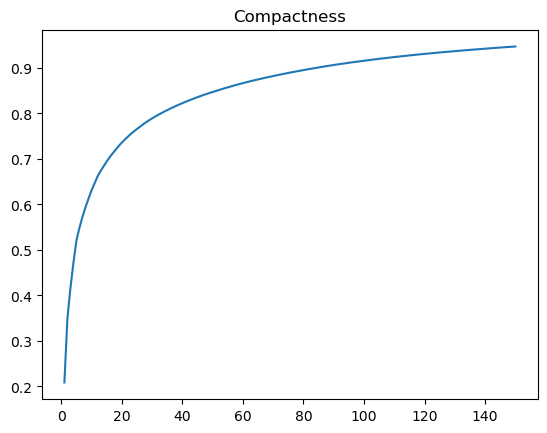

In [13]:
# Compactness plot
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = torch.cumsum(explained_variance_ratio, dim=0)

plt.plot(range(1, n_components + 1), ratio_cumsum[:n_components].numpy())
plt.title('Compactness')
plt.show()